<font size="6">Lesson 4: Overfitting and Underfitting</font>

Readings:
- [Chapter 5.2](https://www.deeplearningbook.org/contents/ml.html)
- [L1/L2 regularization](https://medium.com/@pavanmeduri1_55193/l1-l2-regularization-409039dd111a)

In [1]:
# import what you need
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from implements_04.functions_04 import *

--- 

<font size="5">Overviews</font>
1. Introduction
1. Flow
1. Underfitting
1. Overfitting
1. Regularization
1. Summary

---

--- 

# Introduction
In this notebook, we will to explain **Underfitting** and **Overfitting**. As explained in [chapter 5.2](http://www.deeplearningbook.org/contents/ml.html), 
> Underfitting: the model is not able to obtain a sufficiently low error value on the training set \
> Overfitting: the gap between the training error and test error is too large

In simpler terms, underfitting is where the model is unable to optimally learn the training data, and overfitting where the model learns the training dataset in an undesirable way.

As an analogy, suppose someone is learning to write novels by studying J. R. R. Tolkien's Lord of the Rings trilogy.
Underfitting would occur if you did not understand Tolken's writing and were unable to even recall the main points of the story.
On the other hand, if all your own novels became word-for-word copies of Tolkien's writing, you would have overfitted to the data.

Much of the code in this notebook is shortened for convenience. For the full code, see `implements_04/functions_04.py`

---

## Data

Let's first generate some data to train our models on.

We will use noiseless 2D data in the form $(x, y)$, where $y=x^3-20x^2+500$.

---

Text(0, 0.5, 'y')

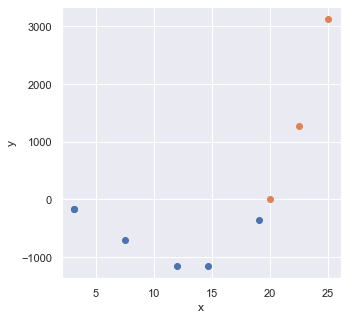

In [2]:
# data preparation
x, y, x_test, y_test = data_generator(num=6, test_num=3)

# data visualization
plt.figure(figsize=(5, 5))
plt.scatter(x, y)
plt.scatter(x_test, y_test)
plt.xlabel("x")
plt.ylabel("y")

## Polynomial Regression
In this experiment, we will the [mean squared error (MSE)](https://www.freecodecamp.org/news/machine-learning-mean-squared-error-regression-line-c7dde9a26b93/) as our loss function. It is defined as:
$$
MSE(y_{pred}, y_{true}) = \sqrt{\frac{1}{n}\sum_{l=1}^n (y_{pred}-y_{true})^2}
$$

Where $n$ is the number of of data points, $y_{pred}$ our prediction, and $y_{true}$ true output.

<img src="implements_04/image/MSE.jpg" width="500">

---

[Linear regression](http://onlinestatbook.com/2/regression/intro.html) is the simplest model for machine learning. $y$ is predicted using formula below:
$$
y_{pred} = a_0 + a_1x
$$

Where $a_i$ is a trainable coefficient and $x$ is a variable.

---

In this notebook, we will also use polynomial regression. It is similar to simple linear regression, but whereas there we only have one, first order $x$ term, in the polynomial case we have as many terms as the order of our regression, with one for each power of $x$. $y$ is predicted using formula below:

$$
y_{pred} = \sum_{l=0}^n a_l x^l \\
y_{pred} = a_0 + a_1x + a_2x^2 + a_3x^3 .... + a_nx^n
$$

Where $n$ is order of the model. A higher order require more $x$ terms and coefficients, therefore increasing the $complexity$ of the model.

In [3]:
#--- parameter ---#
order = 3 # order of polynomial fuction, complexity of the model.
#-----------------#

# Define model
pf = PolynomialFeatures(degree=order, include_bias=False)
model = LinearRegression(fit_intercept=False)

# train the model on the training dataset
x_ = pf.fit_transform(x)
model.fit(x_, y)

# observe the error on the training set
print()
y_pred = model.predict(x_)
print(f"Training loss: {round(mse(y_pred, y), 6)}")

print()
# observe the error on the test set
x_ = pf.fit_transform(x_test)
y_pred = model.predict(x_)
print(f"Test loss: {round(mse(y_pred, y_test), 6)}")


Training loss: 0.0

Test loss: 0.0


In [4]:
# observe the coefficient of the predicted fuction
print()
coef = np.reshape(model.coef_.reshape(-1), (1, -1))
for i in range(coef.shape[1]):
    print(f"Coefficient {i+1} = {round(coef[0,i], 6)}")


Coefficient 1 = -0.0
Coefficient 2 = -20.0
Coefficient 3 = 1.0


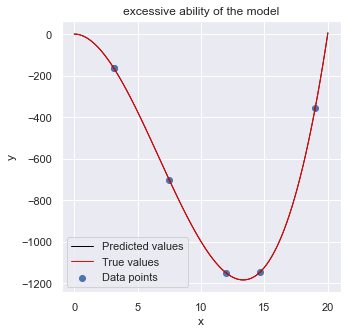

In [5]:
# visualization of the predicted and true function
line = np.reshape(np.linspace(0, x.max()+1, 100), (100, 1))
y_predict = f(line, model)
y_true = f_true(line)

plt.figure(figsize=(5, 5))
plt.scatter(x, y, label="Data points")
plt.plot(line, y_predict, c="black", label="Predicted values", linewidth=1)
plt.plot(line, y_true, c="red", label="True values", linewidth=1)
plt.title("excessive ability of the model")
plt.xlabel("x")
plt.ylabel("y")
plt.legend();

---

# Underfitting
Underfittiny occurst the determined model doesn't have enough **complexity**, also referred to as **capability**, to solve the given problem. 

An example of underfitting is shown below. It is clear that the model couldn't represent the training data adequately. The reason is lack of the ability of the model: in this case, it is of too low an order (a simple linear model).

---

In [6]:
order = 1 # 1 means linear regression

# model prediction
model, pf = predict_polyreg(x, y, order)

# get errors
train_error, test_error = get_errors(pf, model, x, y, x_test, y_test)
print(f"Training error: {round(train_error, 6)}")
print(f"Test error : {round(test_error, 6)}")

Training error: 133976.457478
Test error : 8154419.707942


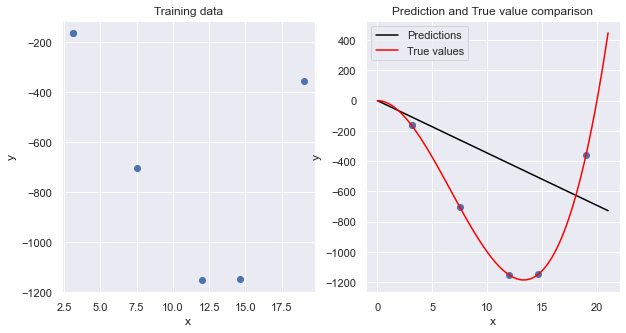

In [7]:
line = np.reshape(np.linspace(0, x.max()+2, 100), (100, 1))
y_predict = f(line, model)
y_true = f_true(line)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(x, y)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Training data")
ax = fig.add_subplot(1, 2, 2)
ax.scatter(x, y)
ax.plot(line, y_predict, c="black", label="Predictions")
ax.plot(line, y_true, c="red", label="True values")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Prediction and True value comparison")
plt.legend();

---

---> This data cannot be adequately learned using only a linear regression

---

--- 

# Overfitting
The main purpose of machine learning is to predict unknown data from the data we have, e.g. the training data. This is known as **generalization**. It is possible, however, for the model to learn said data too well--memorizing the points rather than learning the overall pattern in the data. This is known as **Overfitting** in this field. In Japanese we call it "過学習" and it is kind of "深読み" or "偏見" for our real world.

There are two factors that lead to Overfitting:
1. lack of training data
2. excessive complexity of the model relative to the complexity of the training set
    - The complexity of the model can be thought of as how much the model can memorize
        
There are three ways to prevent overfitting:        
1. Prepare as much training data as possible.
2. Prepare a model whose capacity fits the complexity of the data.
3. Employ Regularization

---

In [8]:
order = 8 # 1 means linear regression

# model prediction
model, pf = predict_polyreg(x, y, order)

# get errors
train_error, test_error = get_errors(pf, model, x, y, x_test, y_test)
print(f"Training error: {round(train_error, 6)}")
print(f"Test error : {round(test_error, 6)}")

Training error: 0.0
Test error : 30707752118.418762


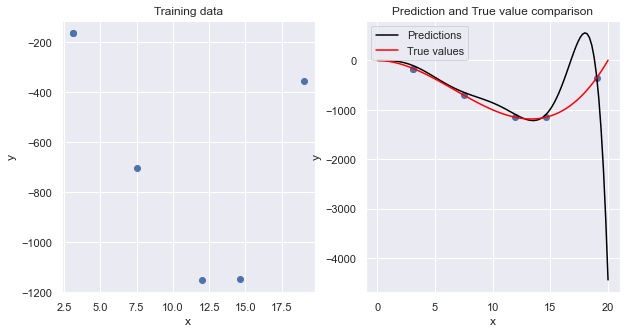

In [9]:
line = np.reshape(np.linspace(0, x.max()+1, 100), (100, 1))
y_predict = f(line, model)
y_true = f_true(line)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(x, y)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Training data")
xlim = ax.get_xlim()
ylim = ax.get_ylim()

ax = fig.add_subplot(1, 2, 2)
ax.scatter(x, y)
ax.plot(line, y_predict, c="black", label="Predictions")
ax.plot(line, y_true, c="red", label="True values")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Prediction and True value comparison")
plt.legend()

---

The train loss is very low, but the test loss is very high. This means our model will not **generalize** well.
This is our definition of overfitting. Let's try to fix it!

---

---

## Training on more data

What happens if we have more data to work with, not changing the order of the polynomial model?

---

In [10]:
training_num = 10

# data generation
x_many, y_many, x_test_many, y_test_many = data_generator(training_num)

# model prediction
model, pf = predict_polyreg(x_many, y_many, order)

# get errors
train_error, test_error = get_errors(pf, model, x_many, y_many, x_test_many, y_test_many)
print(f"Training error: {round(train_error, 6)}")
print(f"Test error : {round(test_error)}")

Training error: 0.0
Test error : 0.0


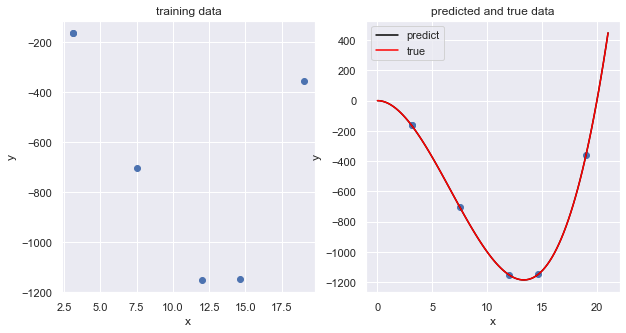

In [11]:
line = np.reshape(np.linspace(0, x.max()+2, 100), (100, 1))
y_predict = f(line, model)
y_true = f_true(line)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(x, y)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("training data")
ax = fig.add_subplot(1, 2, 2)
ax.scatter(x, y)
ax.plot(line, y_predict, c="black", label="predict")
ax.plot(line, y_true, c="red", label="true")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("predicted and true data")
plt.legend();

---

Both the train loss and the test loss are very low and the test loss is very high. This means our model was able to learn the data well.
Having more data gives our model more information from which it can deduce the patterns.

Mathematically, in the polynomial case, we need at least as many data points as the order of our model. Otherwise, the system of equations that defines our optimization problem will be [undetermined](https://en.wikipedia.org/wiki/Underdetermined_system), and there will be infinitely many coefficients that fit the data exactly

---

---

## Lowering model complexity

We can also prevent overfitting by using a lower capacity model.

---

In [12]:
order = 4

# model prediction
model, pf = predict_polyreg(x, y, order)

# get errors
train_error, test_error = get_errors(pf, model, x, y, x_test, y_test)
print(f"train error: {round(train_error)}")
print(f"test error : {round(test_error)}")

train error: 0.0
test error : 0.0


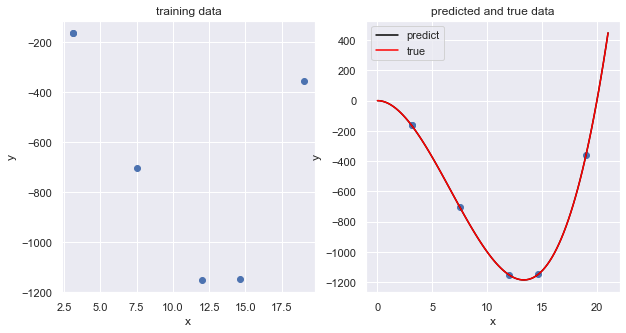

In [13]:
line = np.reshape(np.linspace(0, x.max()+2, 100), (100, 1))
y_predict = f(line, model)
y_true = f_true(line)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(x, y)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("training data")
ax = fig.add_subplot(1, 2, 2)
ax.scatter(x, y)
ax.plot(line, y_predict, c="black", label="predict")
ax.plot(line, y_true, c="red", label="true")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("predicted and true data")
plt.legend();

---

# Regularization
In reality, it is difficult to determine the complexity of the training set prefectly, and we often cannot easily acquire more training data. In this case, we can use a regularization to improve model generalization.
Regularization is the addition of additional loss terms to our model that penalize different factors. This is done to reduce model complexity, thus reducing the risk of overfitting, and giving more flexibility in our model design.

Two common types or regularization are first and second order wight penalties, also known as L1 and L2 regularization or Lasso and Ridge regression, respectively.

<img src="implements_04/image/L1L2_regularization.png">

- [reference of this image](https://medium.com/@pavanmeduri1_55193/l1-l2-regularization-409039dd111a)

In [14]:
from sklearn.linear_model import Ridge, Lasso

## Ridge regression

Ridge regression is a linear regression which the sum of the squares of the weights are added to our loss function.

$$
loss = MSE(y_{pred}, y_{true}) + \alpha |\text{W}|^2
$$

Where $\text{W}$ are the weights of our model, and $\alpha$ controlls the level of regularization, also known as the **L2 coefficient**.

Ridge regression works by uniformly decreasing all our weights. Since the sum of the squares of the weights is the square root of the distance of the weight vector from the origin, it can be also thought of as **pulling the weight vector towards the origin**.

---

In [23]:
order = 8

# model prediction
linear_model, linear_pf = predict_polyreg(x, y, order)
pf = PolynomialFeatures(degree=order, include_bias=False)
model = Ridge(alpha=9, random_state=42) # Ridge model
x_ = pf.fit_transform(x)
model.fit(x_, y)

# get errors
train_error, test_error = get_errors(linear_pf, linear_model, x, y, x_test, y_test)
print(f"Linear: train error: {round(train_error)}")
print(f"Linear: test  error: {round(test_error)}")
print("")
train_error, test_error = get_errors(pf, model, x, y, x_test, y_test)
print(f"Ridge : train error: {round(train_error)}")
print(f"Ridge : test  error: {round(test_error)}")

Linear: train error: 0.0
Linear: test  error: 30707752118.0

Ridge : train error: 0.0
Ridge : test  error: 15563675154.0


In [24]:
print("- Coefficients of the original model")
coef_visualizer(linear_model)
print()
print("- Coefficients of the model with regularization")
coef_visualizer(model)

- Coefficients of the original model
Coefficient 1 = -0.074077
Coefficient 2 = -0.377184
Coefficient 3 = -1.195663
Coefficient 4 = -2.090312
Coefficient 5 = 0.629628
Coefficient 6 = -0.069339
Coefficient 7 = 0.003373
Coefficient 8 = -6.1e-05

- Coefficients of the model with regularization
Coefficient 1 = -0.000155
Coefficient 2 = -0.001394
Coefficient 3 = -0.008902
Coefficient 4 = -0.043149
Coefficient 5 = -0.128181
Coefficient 6 = 0.024333
Coefficient 7 = -0.001519
Coefficient 8 = 3.2e-05


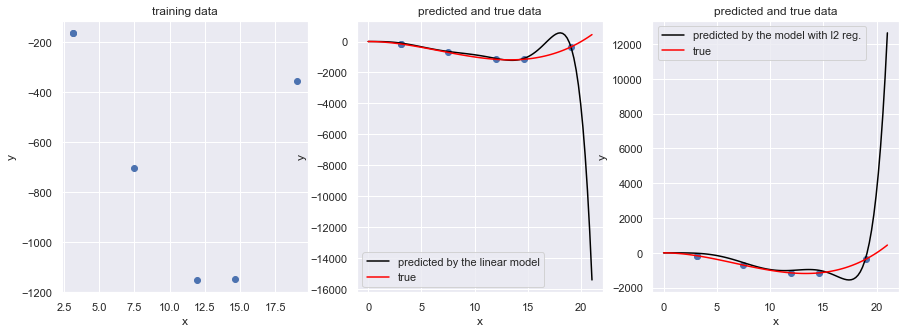

In [25]:
data = []
line = np.reshape(np.linspace(0, x.max()+2, 100), (100, 1))
linear_predict = f(line, linear_model)
y_predict = f(line, model)
y_true = f_true(line)

fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 3, 1)
ax.scatter(x, y)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("training data")
ax = fig.add_subplot(1, 3, 2)
ax.scatter(x, y)
ax.plot(line, linear_predict, c="black", label="predicted by the linear model")
ax.plot(line, y_true, c="red", label="true")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("predicted and true data")
plt.legend()
ax = fig.add_subplot(1, 3, 3)
ax.scatter(x, y)
ax.plot(line, y_predict, c="black", label="predicted by the model with l2 reg.")
ax.plot(line, y_true, c="red", label="true")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("predicted and true data")
plt.legend();

---

## Lasso Regression (L1 regularization)

In this model, a restriction on the weight's L1 norm is employed, i.e. a penalty on the absolute values of the weights. The new loss function is:

$$
loss = MSE(y_{pred}, y_{true}) + \alpha |\text{W}|
$$

Where $\text{W}$ is the weight of the model, and $\alpha$ controlls the level of regularization

---

In [26]:
ourder = 8

# model prediction
linear_model, linear_pf = predict_polyreg(x, y, order)
pf = PolynomialFeatures(degree=order, include_bias=False)
model = Lasso(alpha=10, random_state=42)
x_ = pf.fit_transform(x)
model.fit(x_, y)

# get errors
train_error, test_error = get_errors(linear_pf, linear_model, x, y, x_test, y_test)
print(f"Linear: train error: {round(train_error)}")
print(f"Linear: test  error: {round(test_error)}")
print("")
train_error, test_error = get_errors(pf, model, x, y, x_test, y_test)
print(f"Lasso : train error: {round(train_error)}")
print(f"Lasso : test  error: {round(test_error)}")

Linear: train error: 0.0
Linear: test  error: 30707752118.0

Lasso : train error: 348413.0
Lasso : test  error: 4647750.0


In [27]:
print("- coefficient of the original model")
coef_visualizer(linear_model)
print()
print("- coefficient of the model with regularization")
coef_visualizer(model)

- coefficient of the original model
Coefficient 1 = -0.074077
Coefficient 2 = -0.377184
Coefficient 3 = -1.195663
Coefficient 4 = -2.090312
Coefficient 5 = 0.629628
Coefficient 6 = -0.069339
Coefficient 7 = 0.003373
Coefficient 8 = -6.1e-05

- coefficient of the model with regularization
Coefficient 1 = -75.126833
Coefficient 2 = -6.878489
Coefficient 3 = 0.224796
Coefficient 4 = 0.008271
Coefficient 5 = 0.000226
Coefficient 6 = 5e-06
Coefficient 7 = 0.0
Coefficient 8 = -0.0


---

Whereas L2 regularization reduces all weights uniformly, L1 regularization tends to push individual wieights to 0, starting with the least important among them. 
This can be thought of as a feature selection of sorts. This is especially effective in out example problem:

---

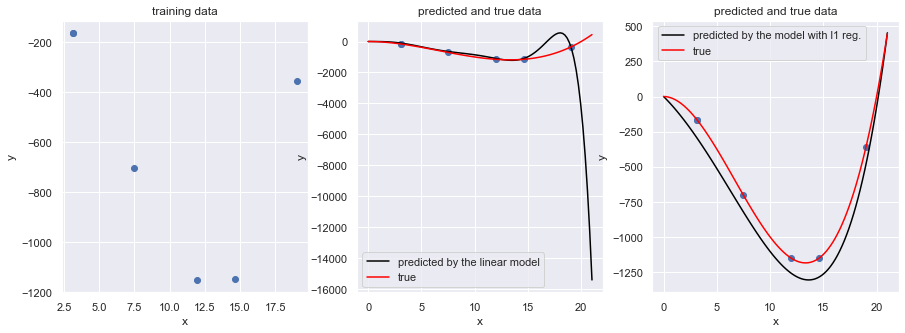

In [29]:
data = []
line = np.reshape(np.linspace(0, x.max()+2, 100), (100, 1))
linear_predict = f(line, linear_model)
y_predict = f(line, model)
y_true = f_true(line)

fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 3, 1)
ax.scatter(x, y)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("training data")
ax = fig.add_subplot(1, 3, 2)
ax.scatter(x, y)
ax.plot(line, linear_predict, c="black", label="predicted by the linear model")
ax.plot(line, y_true, c="red", label="true")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("predicted and true data")
plt.legend()
ax = fig.add_subplot(1, 3, 3)
ax.scatter(x, y)
ax.plot(line, y_predict, c="black", label="predicted by the model with l1 reg.")
ax.plot(line, y_true, c="red", label="true")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("predicted and true data")
plt.legend()

---

While lasso regression works better in this specific training set, this is not a general truth. It is important to find which works best, problem by problem.

---

# Summary

---

Over- and under-fitting are two of the biggest difficulties in training machine learning models. We've demonstrated 3 importat factors for preventing these problems:
1. Train on as large a training dataset as possible;
2. Use a model with a complexity appropriate for the problem;
3. Apply regularization when necessary

There are many other types of regularization not demonstrated in this lesson. Some of them include [early stopping](), [batch normalization]() and [dataset 

---